In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

from glob import glob

In [12]:
plt.rcParams['figure.dpi'] = 720
plt.rcParams['figure.figsize'] = (10,2)
plt.style.use('grayscale')

In [13]:
# Diabetes (from pandas)
diabetes_data = datasets.load_diabetes()
df = pd.DataFrame(diabetes_data.data,columns=diabetes_data.feature_names)
df['target'] = pd.Series(diabetes_data.target)

In [14]:
### Objective function
def objective_weighting(trial):
    weighted_df = df.copy()
    features_list = list(df.drop(target_variable, axis = 1))
    for i, feature in enumerate(features_list):
        weighted_df[feature] *= trial.suggest_uniform(feature, 0, 1)

    train_set = weighted_df.iloc[:int(train_validation_split * len(weighted_df))]
    test_set = weighted_df.iloc[int(train_validation_split * len(weighted_df)):]

    clf.fit(train_set[features_list], train_set[target_variable])

    return mean_squared_error(clf.predict(test_set[features_list]), test_set[target_variable])

target_variable = 'target'
train_validation_split = 0.75
neighbor_samples_ratio = 0.05
clf = KNeighborsRegressor(n_neighbors = int(len(df) * neighbor_samples_ratio), n_jobs = -1)

study = optuna.create_study()
study.optimize(objective_weighting, n_trials=500)

In [15]:
data = study.trials_dataframe()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


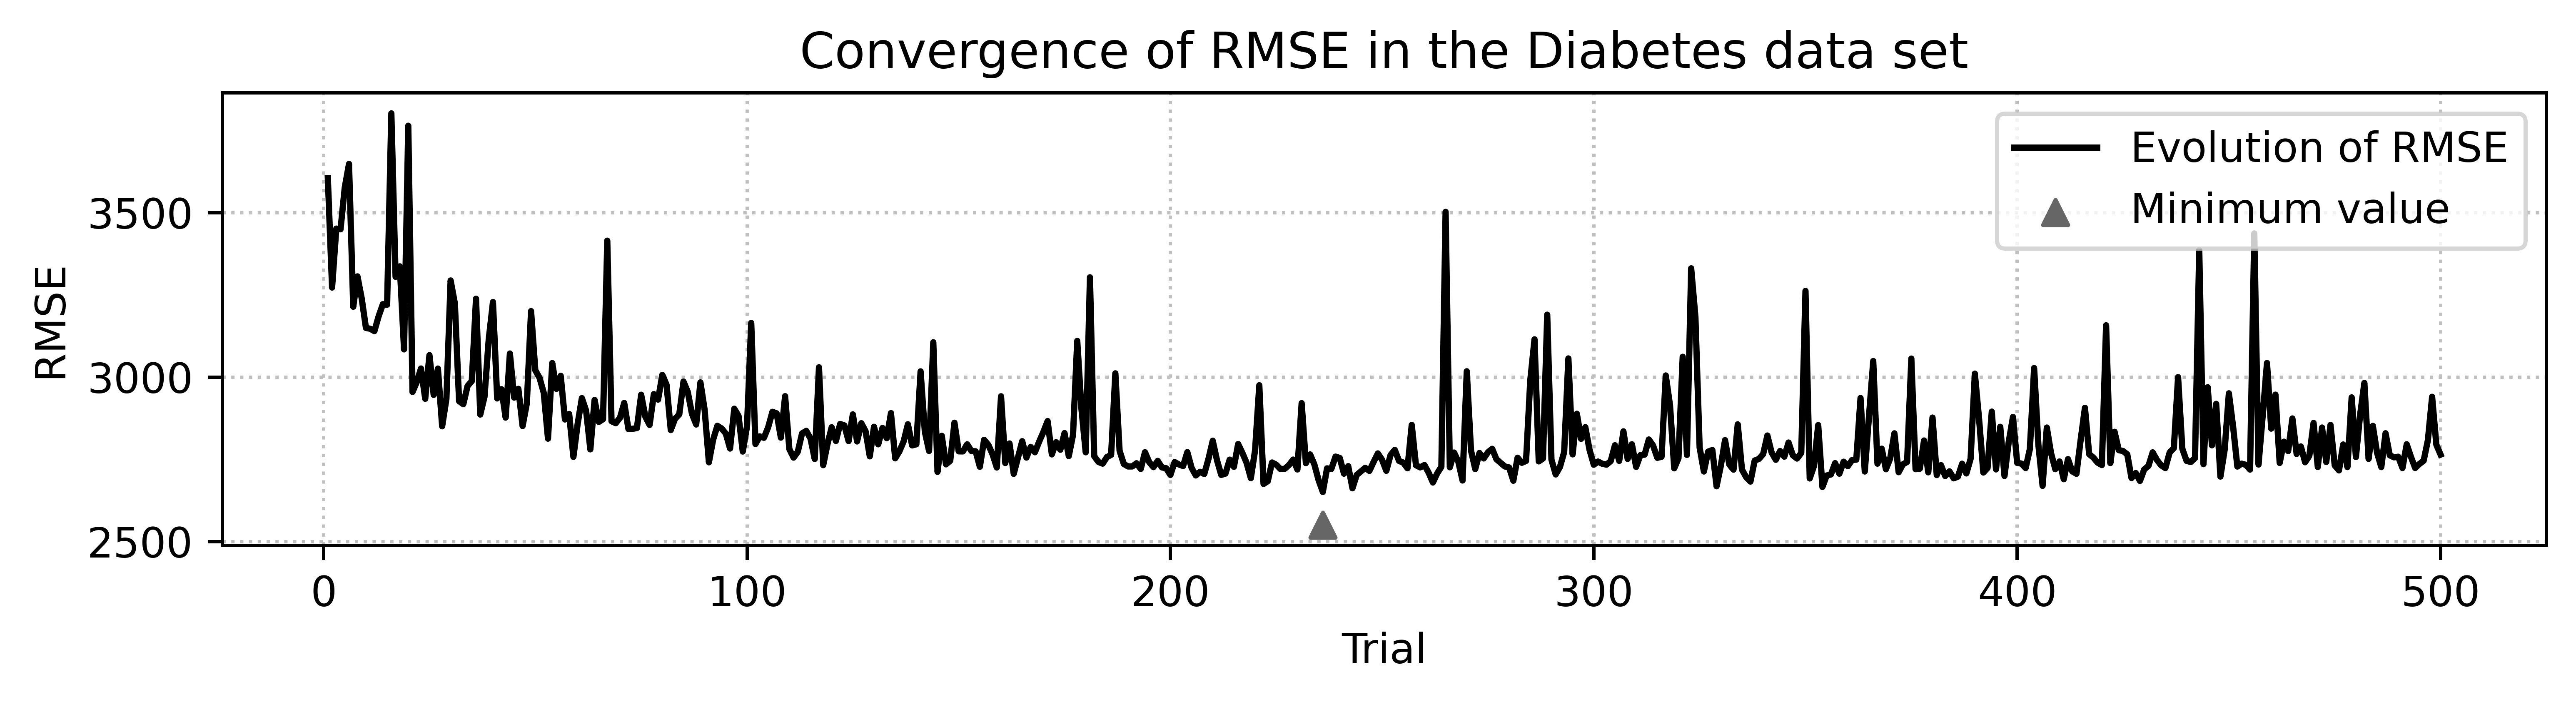

In [21]:
fig = plt.figure()
fig.patch.set_facecolor('white')

plt.grid(linestyle=':', color = 'silver')
plt.title('Convergence of RMSE in the Diabetes data set')
plt.plot(data.number + 1, data.value, label = 'Evolution of RMSE')
plt.scatter(data[data.value == data.value.min()].number + 1, data[data.value == data.value.min()].value - 100, marker = '^', color = 'C1', label = 'Minimum value')
plt.xlabel('Trial')
plt.ylabel('RMSE')
plt.legend()

plt.savefig('figures/error_convergence.eps', format='eps');